In [5]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
import time
from matplotlib.pyplot import figure
%matplotlib inline

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Input(batch_input_shape=(1,2))) # Date de intrare
model_adam.add(keras.layers.Dense(32, activation='relu'))
model_adam.add(keras.layers.Dense(16, activation='relu'))
model_adam.add(keras.layers.Dense(1, activation='linear')) # Date de iesire
model_adam.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_adam.summary()

def f(x, y):
    return 7 * x * y / np.exp(x * x + y * y)
SIZE = 500
xs = np.linspace(-2, 2, SIZE)
ys = np.linspace(-2, 2, SIZE)
xy = []
zs = []

for x in xs:
    for y in ys:
        xy.append((x,y))
        zs.append(f(x,y))


Z_no_train = model_adam.predict(xy).reshape((SIZE, SIZE))
# y_no_train = model_adam.predict(xs)

history = model_adam.fit(xy, zs, epochs=2)
# history_sgd = model_sgd.fit(xs, ys, epochs=50)
print(history.params)
print(history.history.keys())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (1, 32)                   96        
_________________________________________________________________
dense_7 (Dense)              (1, 16)                   528       
_________________________________________________________________
dense_8 (Dense)              (1, 1)                    17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
7813/7813 [==============================] - 45s 6ms/step - loss: 0.0495 - mse: 0.0495
Epoch 2/2
7813/7813 [==============================] - 44s 6ms/step - loss: 3.5271e-04 - mse: 3.5271e-04
{'verbose': 1, 'epochs': 2, 'steps': 7813}
dict_keys(['loss', 'mse'])


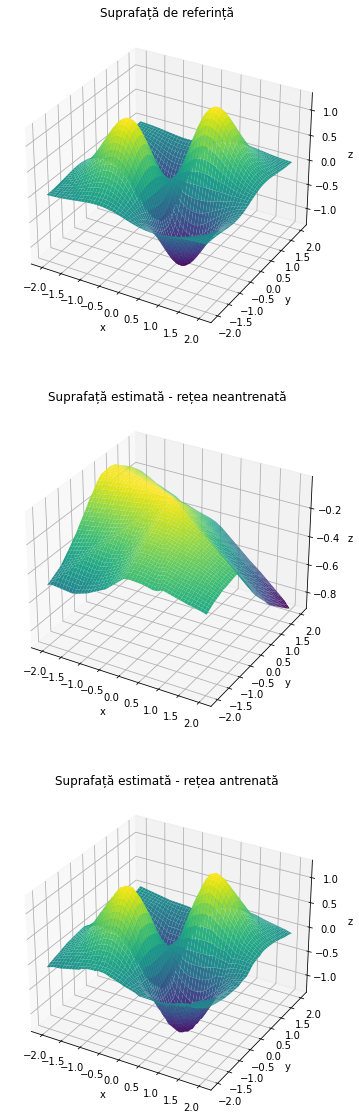

In [16]:
X, Y = np.meshgrid(xs, ys)
Z = f(X, Y)

#figure(figsize=(30, 15), dpi=80)
#plt.rcParams['figure.figsize'] = [10, 30]
fig = plt.figure(figsize = (25,20)) # figsize = (20,15)
ax = fig.add_subplot(311, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Suprafață de referință')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(312, projection='3d')

ax.plot_surface(X, Y, Z_no_train,cmap='viridis', edgecolor='none')
ax.set_title('Suprafață estimată - rețea neantrenată')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Z = model_adam.predict(xy).reshape((SIZE, SIZE))

ax = fig.add_subplot(313, projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Suprafață estimată - rețea antrenată')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

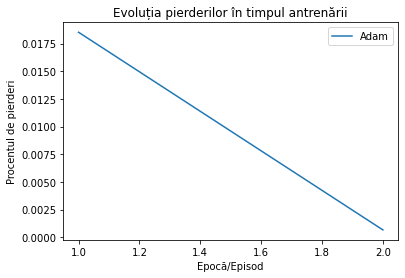

In [3]:
epochs = [i for i in range(1, 3)]
plt.plot(epochs, history.history["mse"], label='Adam')
plt.xlabel('Epocă/Episod')
plt.ylabel('Procentul de pierderi')
plt.title('Evoluția pierderilor în timpul antrenării')
plt.legend()